In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/loan_prediction.csv")
df.head(5)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
#Dropping the Loan_ID Column labels
df = df.drop('Loan_ID', axis = 1)
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [4]:

df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
#prints True if any Duplicated values are present in the Data
df.duplicated().any()


False

In [6]:
cl = [x for x in df.columns[:-1] if (df[x].dtype == 'object')]
print(cl)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


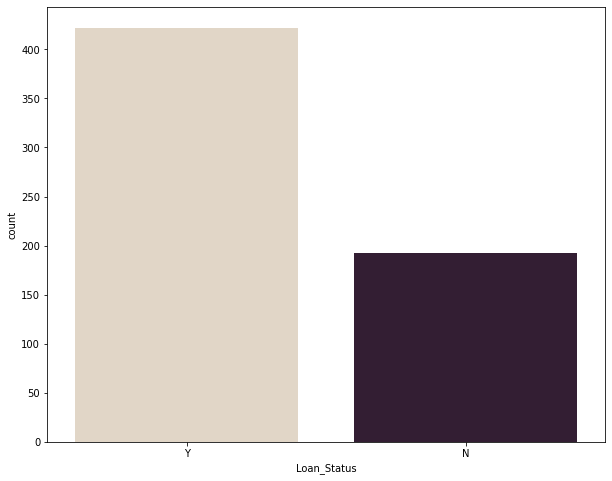

In [7]:
plt.subplots(figsize = (10, 8))
sns.countplot(df.loc[:, "Loan_Status"], palette='ch:.25')
plt.show()



In [8]:
print("Percentage of Yes Class :", round(df['Loan_Status'].value_counts()[0]/len(df), 2))
print("Percentage of No class  :", round(df['Loan_Status'].value_counts()[1]/len(df), 2))

Percentage of Yes Class : 0.69
Percentage of No class  : 0.31


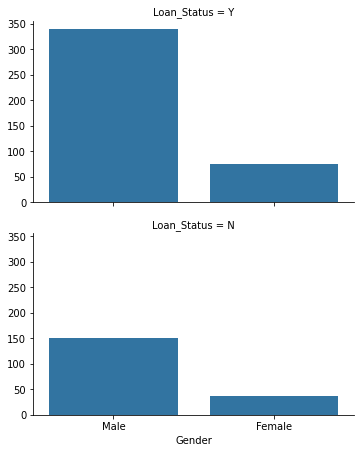

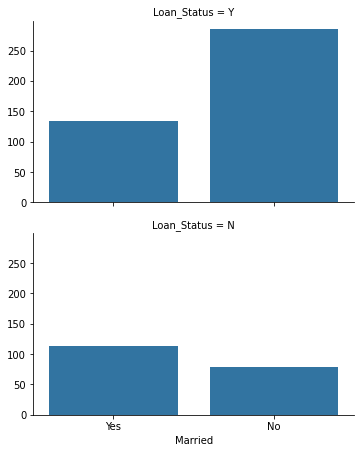

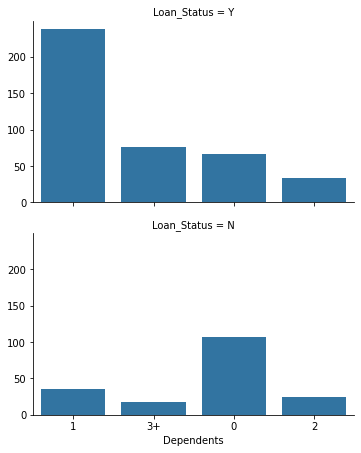

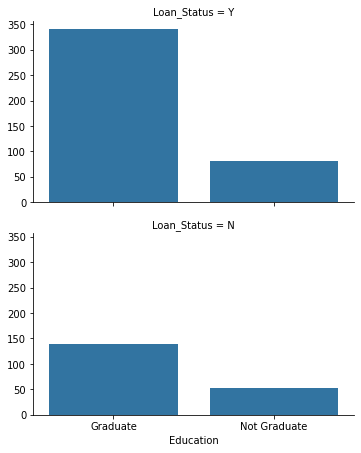

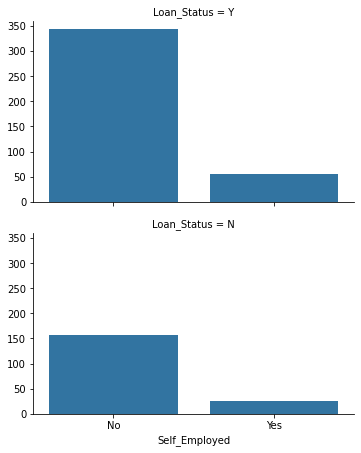

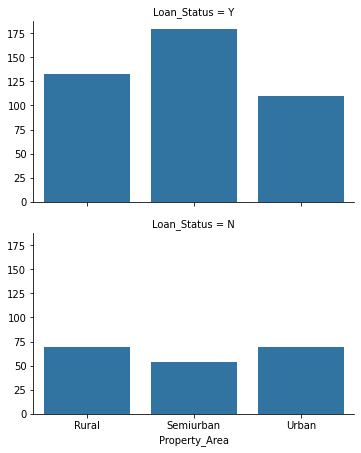

In [9]:
import warnings 
warnings.filterwarnings("ignore")


for cn in cl:
  grid = sns.FacetGrid(df, 'Loan_Status', palette='ch:.26', size = 3.2, aspect= 1.6)
  grid.map(sns.countplot, cn)
  
  plt.show()
  print(20*'===')

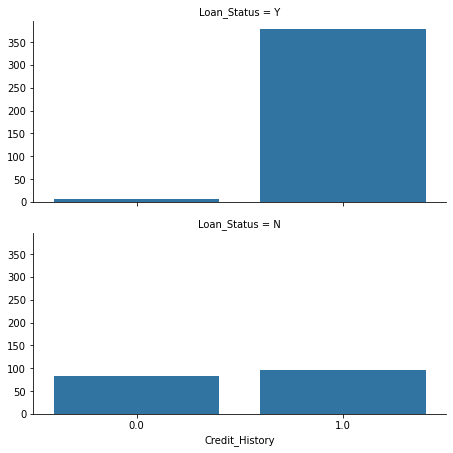

In [10]:
grid = sns.FacetGrid(df, 'Loan_Status', size = 3.2, aspect= 2)
grid.map(sns.countplot, 'Credit_History')
plt.show()

# **Observations:**
1. In case of Gender there are more chances for Loan Sanction for Male Category.

2. In case of Married there are more chances for Loan Sanction for Bachelors than Married Couples.
 
3. In case of Dependents the loan is sanctioned for the people having 1 Dependent.  

4. In case of Education the loan is sanctioned to the people who have Graduation Degree.

5. In case of Self Employed the loan is sanctioned more for the people who are not self_employed.

6. In case of Property Area the people having more semi Urban property are given a loan than other people having other properties.

7. In case of Credit History people having credit history value 1 are given a loan. 

In [11]:
#Now coming to the numerical variables. 
df.groupby('Loan_Status').median()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,3833.5,268.0,129.0,360.0,1.0
Y,3812.5,1239.5,126.0,360.0,1.0


# **Observation :**
 from the above chart the loan is sanctioned to those who has high coapplicant income high.

In [32]:
df['Loan_Status']


0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [35]:
# Importing dataset
from pycaret.datasets import get_data
diabetes = get_data('diabetes')

# Importing module and initializing setup
from pycaret.classification import *
clf1 = setup(data = diabetes, target = 'Class variable')
# comparing all models
compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extreme Gradient Boosting,0.758000,0.816100,0.605300,0.680800,0.634300,0.455700
1,CatBoost Classifier,0.757900,0.809300,0.583000,0.682800,0.624000,0.448100
2,Gradient Boosting Classifier,0.757700,0.798200,0.593300,0.683600,0.629600,0.451800
3,Logistic Regression,0.748400,0.798100,0.512600,0.697000,0.587200,0.412200
4,Ada Boost Classifier,0.744700,0.777000,0.608800,0.644100,0.624200,0.431300
5,Linear Discriminant Analysis,0.744700,0.798400,0.507900,0.690100,0.581700,0.404000
6,Ridge Classifier,0.742800,0.000000,0.497100,0.691000,0.574200,0.396900
7,Extra Trees Classifier,0.729900,0.772300,0.497400,0.660400,0.562100,0.372400
8,K Neighbors Classifier,0.724400,0.754200,0.529500,0.626900,0.572500,0.371500
9,Random Forest Classifier,0.718900,0.764800,0.459900,0.633600,0.530900,0.338100


In [39]:
# Importing dataset
from pycaret.datasets import get_data


# Importing module and initializing setup
from pycaret.classification import *
clf1 = setup(data = df, target = 'Loan_Status')
# comparing all models
compare_models()


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.799500,0.000000,0.979500,0.783600,0.870500,0.448900
1,CatBoost Classifier,0.797200,0.766300,0.952800,0.793900,0.865700,0.464500
2,Linear Discriminant Analysis,0.792500,0.719600,0.969400,0.781800,0.865300,0.434000
3,Logistic Regression,0.778600,0.723000,0.942200,0.781200,0.853400,0.411500
4,Naive Bayes,0.778500,0.730000,0.921700,0.790800,0.850800,0.427100
5,Extreme Gradient Boosting,0.773900,0.710200,0.929100,0.783300,0.849500,0.406700
6,Ada Boost Classifier,0.771500,0.751100,0.901800,0.793800,0.843800,0.422000
7,Light Gradient Boosting Machine,0.766900,0.747400,0.885200,0.798100,0.839100,0.419600
8,Gradient Boosting Classifier,0.762200,0.700700,0.905200,0.783100,0.839300,0.390300
9,Random Forest Classifier,0.759900,0.717100,0.871100,0.798600,0.832500,0.409600


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB
